# Ragged structures in $\sigma(gg \rightarrow H)$ within the hMSSM tuple


This notebook displays some irregular, ragged structures found among the values of $\sigma(gg \rightarrow H)$ along $\tan \beta$

**hMSSM TWiki:**

https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHXSWGMSSMNeutral#ROOT_histograms_MSSM_benchmark_s

**Using the following file as input:**

hMSSM_13TeV.root:
https://twiki.cern.ch/twiki/pub/LHCPhysics/HXSWG3LowTanB/hMSSM_13TeV.root


In [1]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

In [2]:
import functools
import plotting.hMSSM as hMSSM_plot
import matplotlib_utils.plot_func as plu
import itertools

In [3]:
load_mpl_style('ATLAS.mplstyle')

Loading in datasets

In [4]:
xs_gg_H = pd.read_csv('./data/ascii/directly_from_root_file_xs_gg_H.dat', delim_whitespace=True, names=['mA', 'tanb', 'xs_gg_H'])
m_H = pd.read_csv('./data/ascii/directly_from_root_file_m_H.dat', delim_whitespace=True, names=['mA', 'tanb', 'mH'])
br_H_hh = pd.read_csv('./data/ascii/directly_from_root_file_br_H_hh.dat', delim_whitespace=True, names=['mA', 'tanb', 'br_H_hh'])

In [5]:
dfs = [xs_gg_H, m_H, br_H_hh]

In [6]:
df_all = functools.reduce(lambda left,right: pd.merge(left,right,on=['mA', 'tanb'], how='inner'), dfs)

Some example for the contents:

In [7]:
df_all[3000:3010]

,mA,tanb,xs_gg_H,mH,br_H_hh
3000,265.0,37.0,9.332552,260.075989,0.000220
3001,265.0,38.0,9.834391,260.071991,0.000195
3002,265.0,39.0,10.350080,260.069000,0.000173
3003,265.0,40.0,10.879618,260.065002,0.000153
3004,265.0,41.0,11.422974,260.062012,0.000135
3005,265.0,42.0,11.980211,260.058990,0.000119
3006,265.0,43.0,12.551280,260.056000,0.000105
3007,265.0,44.0,13.136169,260.053986,0.000093
3008,265.0,45.0,13.734891,260.050995,0.000082
3009,265.0,46.0,14.347434,260.049011,0.000073


Ranges:

In [8]:
df_all.describe()

,mA,tanb,xs_gg_H,mH,br_H_hh
count,40500.000000,40500.00000,40500.000000,40459.000000,40499.000000
mean,1065.000000,18.47662,3.457224,1054.221847,0.025005
std,541.270635,18.66527,26.763879,545.802518,0.082476
min,130.000000,0.80000,0.000000,0.000000,0.000000
25%,595.000000,3.47500,0.000212,583.339020,0.000032
50%,1065.000000,6.63750,0.003370,1055.010010,0.003156
75%,1535.000000,33.25000,0.129336,1525.440002,0.010900
max,2000.000000,60.00000,793.519531,4402.600098,0.654800


Focusing on $m_{A} = [180-600]$, $\tan\beta=[1-5]$

In [9]:
df = df_all.query('mA > 180.0 & mA < 600.0 & tanb > 1.0 & tanb < 5.0')

## $\sigma(gg \rightarrow H)$

### Here is how it looks on the ($m_{A}$,$\tan\beta$) plane

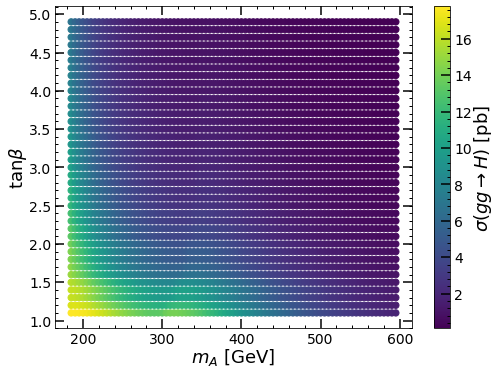

In [10]:
f,a = plt.subplots()
df.plot.scatter('mA', 'tanb', c='xs_gg_H', cmap='viridis', s=40, ax=a)
cb = f.get_axes()[1]
cb.set_ylabel(r"$\sigma(gg \rightarrow H)$ [pb]")
a.set_xlabel(r"$m_{A}$ [GeV]")
a.set_ylabel(r"$\tan \beta$");

### Profile along $\tan\beta$ for a fixed $m_{A}$

#### Fixed $m_{A} = 300$

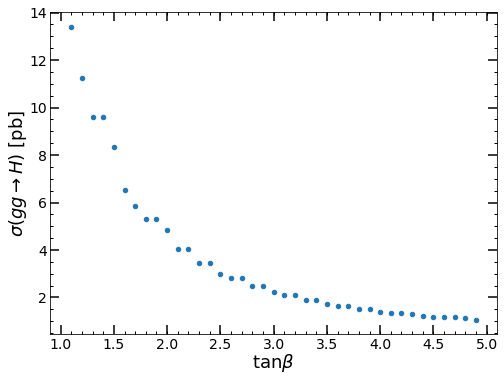

In [11]:
f,a = plt.subplots()
df.query('mA == 300.0').plot.scatter('tanb', 'xs_gg_H', ax=a)
a.set_xlabel(r"$\tan \beta$")
a.set_ylabel(r"$\sigma(gg \rightarrow H)$ [pb]");

$\sigma(gg \rightarrow H)$ displays some ragged structures along $\tan \beta$, even though $\tan \beta$ is increased $\sigma(gg \rightarrow H)$ stays the same for some pairs of points

#### Fixed $m_{A} = 400$

This feature is present along all values of $m_{A}$, here is one for $m_{A} = 400$ GeV

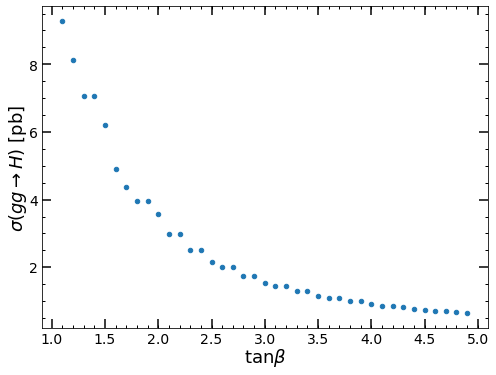

In [12]:
f,a = plt.subplots()
df.query('mA == 400.0').plot.scatter('tanb', 'xs_gg_H', ax=a)
a.set_xlabel(r"$\tan \beta$")
a.set_ylabel(r"$\sigma(gg \rightarrow H)$ [pb]");

#### Fixed $m_{A} = 450$

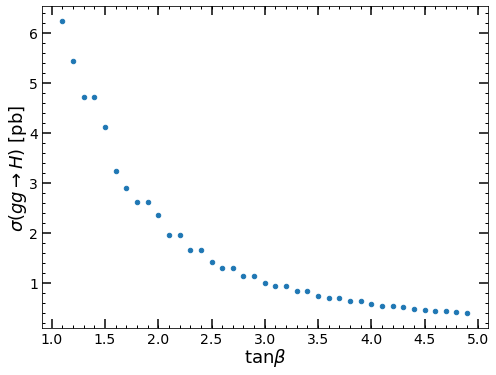

In [13]:
f,a = plt.subplots()
df.query('mA == 450.0').plot.scatter('tanb', 'xs_gg_H', ax=a)
a.set_xlabel(r"$\tan \beta$")
a.set_ylabel(r"$\sigma(gg \rightarrow H)$ [pb]");

For comparison here is how $\mathcal{B}r(H \rightarrow hh)$ and $m_{H}$ looks like

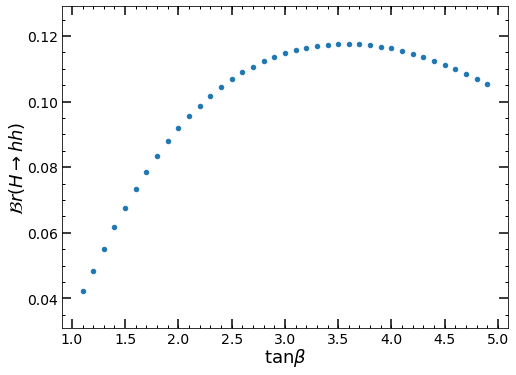

In [14]:
f,a = plt.subplots()
df.query('mA == 450.0').plot.scatter('tanb', 'br_H_hh', ax=a)
a.set_xlabel(r"$\tan \beta$")
a.set_ylabel(r"$\mathcal{B}r( H \rightarrow hh)$");

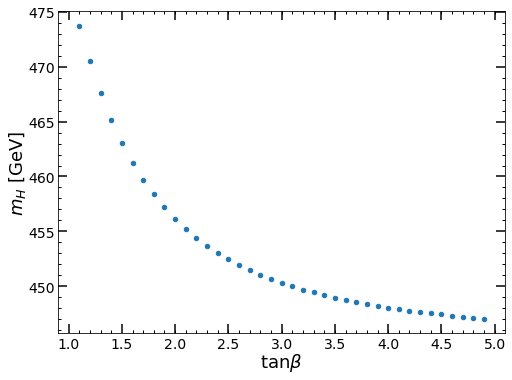

In [15]:
f,a = plt.subplots()
df.query('mA == 450.0').plot.scatter('tanb', 'mH', ax=a)
a.set_xlabel(r"$\tan \beta$")
a.set_ylabel(r"$m_{H}$ [GeV]");

<font color='red' size=5>
**This ragged structure unfortunately also affects the heatmap and contour plots, as you can see below.**
</font>

Preparing variables for contour plot

In [16]:
dfmesh = df.pivot('mA', 'tanb', 'xs_gg_H')
xi, yi, zi = dfmesh.index.values, dfmesh.columns.values, dfmesh.values.T

### Heatmap plot

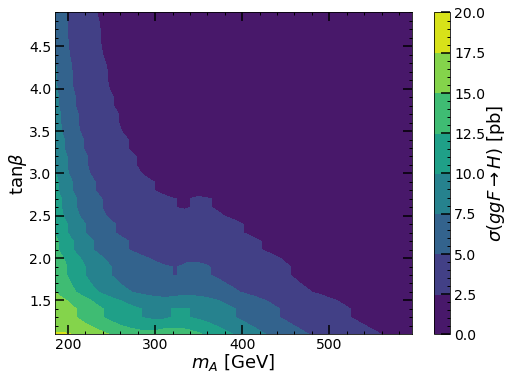

In [17]:
f,a = plt.subplots()
cs = a.contourf(xi,yi,zi)
cb = f.colorbar(cs)
cb.set_label(r'$\sigma(ggF \rightarrow H)$ [pb]')
a.set_xlabel(r"$m_{A}$ [GeV]")
a.set_ylabel(r"$\tan \beta$");

### Contour plot

<a list of 6 text.Text objects>

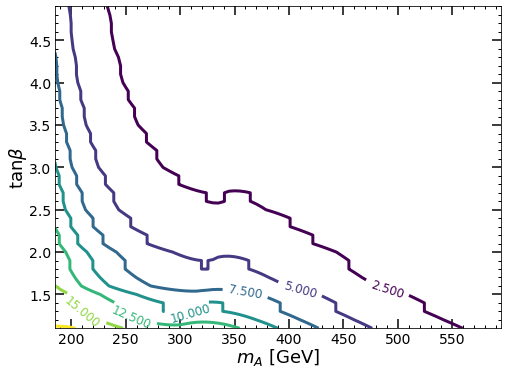

In [18]:
f,a = plt.subplots()
cs = a.contour(xi,yi,zi)
a.set_xlabel(r"$m_{A}$ [GeV]")
a.set_ylabel(r"$\tan \beta$");
plt.clabel(cs, inline=True)

Comparing this to the contours of $m_{H}$

In [19]:
dfmesh = df.pivot('mA', 'tanb', 'mH')
xi, yi, zi = dfmesh.index.values, dfmesh.columns.values, dfmesh.values.T

<a list of 6 text.Text objects>

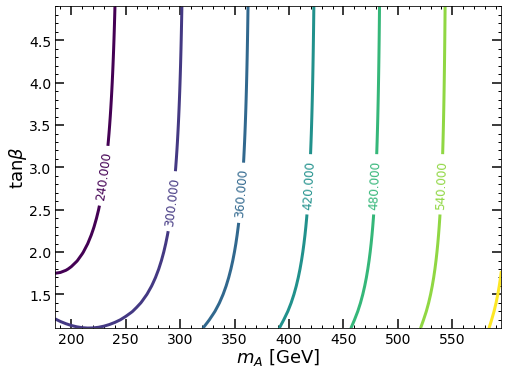

In [20]:
f,a = plt.subplots()
cs = a.contour(xi,yi,zi)
a.set_xlabel(r"$m_{A}$ [GeV]")
a.set_ylabel(r"$\tan \beta$");
plt.clabel(cs, inline=True)

and to the contours of $\mathcal{B}r(H \rightarrow hh)$

In [21]:
dfmesh = df.pivot('mA', 'tanb', 'br_H_hh')
xi, yi, zi = dfmesh.index.values, dfmesh.columns.values, dfmesh.values.T

<a list of 9 text.Text objects>

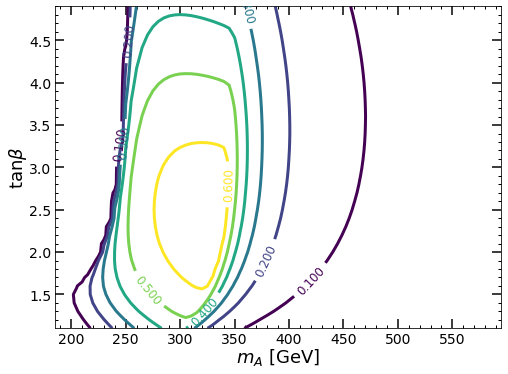

In [22]:
f,a = plt.subplots()
cs = a.contour(xi,yi,zi)
a.set_xlabel(r"$m_{A}$ [GeV]")
a.set_ylabel(r"$\tan \beta$");
plt.clabel(cs, inline=True)

In contrast to $\sigma(ggF \rightarrow H)$, there is no ragged structures in $m_{H}$, $\mathcal{B}r(H \rightarrow hh)$